In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples 
from matplotlib import cm

In [2]:
X = pd.read_csv("data_1024.csv",sep='\t')

X.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


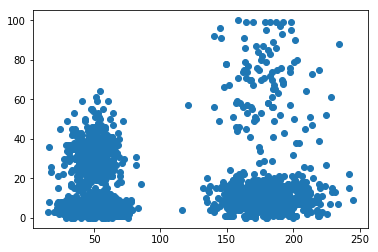

In [3]:
plt.scatter(X.iloc[:,1],X.iloc[:,2])

K = 2


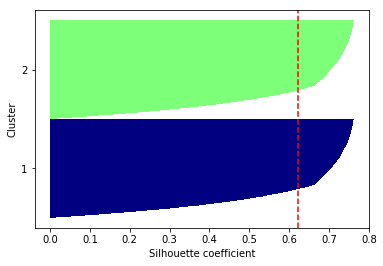

K = 3


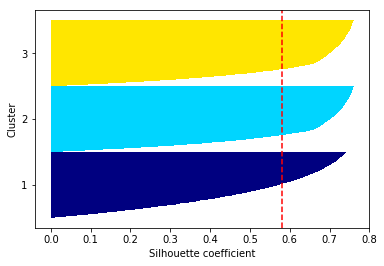

K = 4


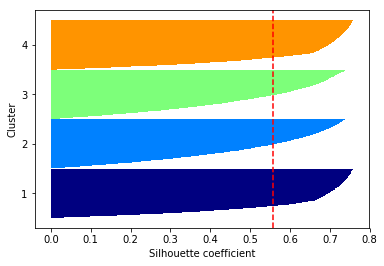

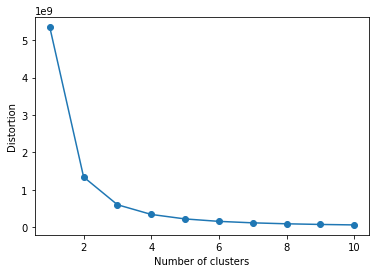

In [4]:

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    y_km = km.fit_predict(X)
    distortions.append(km.inertia_)
    if i == 2 or i == 3 or i == 4:
        cluster_labels = np.unique(y_km)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
        y_ax_lower, y_ax_upper = 0, 0
        yticks = []
        print("K = {}".format(i))
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i) / n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                     edgecolor='none', color=color)

            yticks.append((y_ax_lower + y_ax_upper) / 2.)
            y_ax_lower += len(c_silhouette_vals)

        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg, color="red", linestyle="--") 


    
        plt.yticks(yticks, cluster_labels + 1)
        plt.ylabel('Cluster')
        plt.xlabel('Silhouette coefficient')
        plt.show()
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## KMEANS

In [5]:
%%time
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

CPU times: user 112 ms, sys: 3.9 ms, total: 116 ms
Wall time: 85.3 ms


In [6]:
print("Número de Iterações: {}".format(km.n_iter_))

Número de Iterações: 12


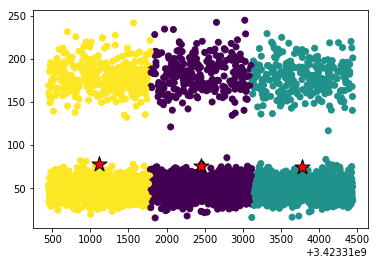

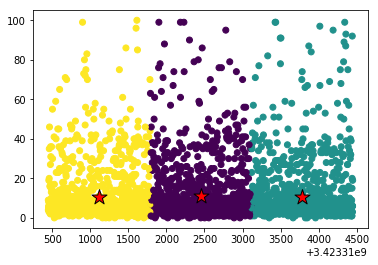

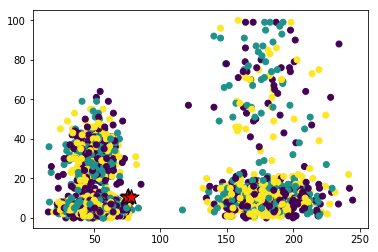

In [7]:

plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_km)
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.show()
    

plt.scatter(X.iloc[:,0],X.iloc[:,2],c=y_km)
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 2],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.show()

plt.scatter(X.iloc[:,1],X.iloc[:,2],c=y_km)
plt.scatter(km.cluster_centers_[:, 1],
            km.cluster_centers_[:, 2],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.show()

## KMEANS++

In [8]:
%%time
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

CPU times: user 159 ms, sys: 7.98 ms, total: 167 ms
Wall time: 84.3 ms


In [9]:
print("Número de Iterações: {}".format(km.n_iter_))

Número de Iterações: 4


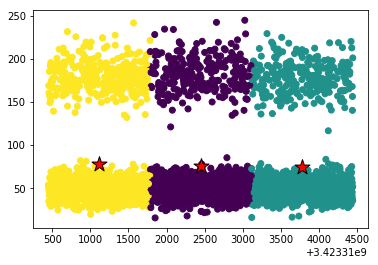

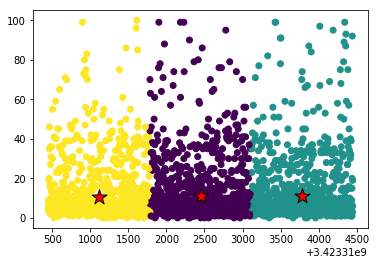

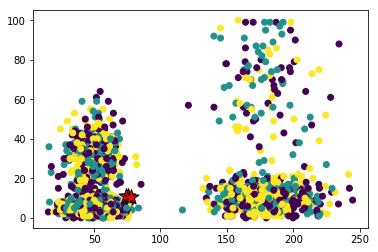

In [10]:

plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_km)
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.show()
    

plt.scatter(X.iloc[:,0],X.iloc[:,2],c=y_km)
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 2],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.show()

plt.scatter(X.iloc[:,1],X.iloc[:,2],c=y_km)
plt.scatter(km.cluster_centers_[:, 1],
            km.cluster_centers_[:, 2],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.show()